## Read File

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("mc_vs_qmc_allmetrics.csv")

colors = {
    "MC": "#FF968A",   
    "QMC": "#55CBCD" }  

## Pi Estimation

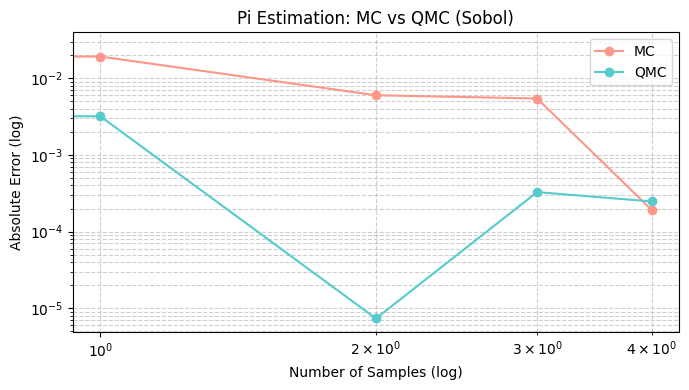

In [9]:
plt.figure(figsize=(7, 4))
for method in ["MC", "QMC"]:
    subset = df[df["Method"] == method]
    plt.plot(subset["N"], subset["PiError"], marker="o", label=method, color= colors[method])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of Samples (log)")
plt.ylabel("Absolute Error (log)")
plt.title("Pi Estimation: MC vs QMC (Sobol)")
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 2D Integral

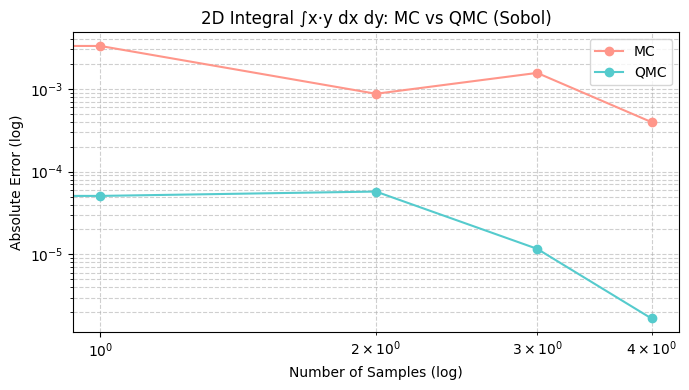

In [10]:
plt.figure(figsize=(7, 4))
for method in ["MC", "QMC"]:
    subset = df[df["Method"] == method]
    plt.plot(subset["N"], subset["XYError"], marker="o", label=method, color= colors[method])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of Samples (log)")
plt.ylabel("Absolute Error (log)")
plt.title("2D Integral ∫x·y dx dy: MC vs QMC (Sobol)")
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Mean of exp

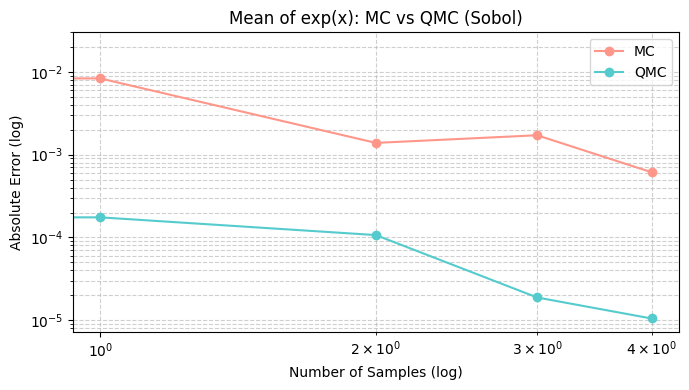

In [11]:
plt.figure(figsize=(7, 4))
for method in ["MC", "QMC"]:
    subset = df[df["Method"] == method]
    plt.plot(subset["N"], subset["ExpXError"], marker="o", label=method, color= colors[method])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of Samples (log)")
plt.ylabel("Absolute Error (log)")
plt.title("Mean of exp(x): MC vs QMC (Sobol)")
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## European Call Option Error

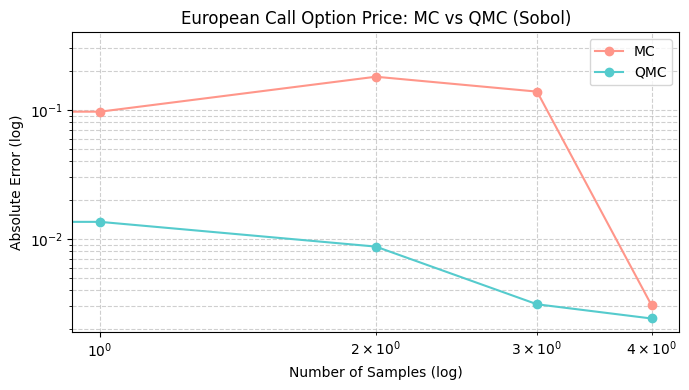

In [12]:
plt.figure(figsize=(7, 4))
for method in ["MC", "QMC"]:
    subset = df[df["Method"] == method]
    plt.plot(subset["N"], subset["CallOptionError"], marker="o", label=method, color= colors[method])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of Samples (log)")
plt.ylabel("Absolute Error (log)")
plt.title("European Call Option Price: MC vs QMC (Sobol)")
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Summary

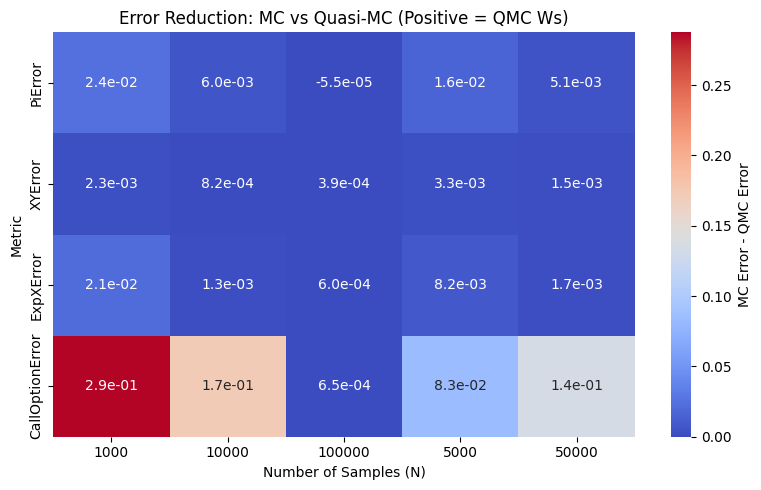

In [13]:
metrics = ["PiError", "XYError", "ExpXError", "CallOptionError"]
pivot = df.pivot_table(index='N', columns='Method')[metrics]
improvement = pivot.xs('MC', axis=1, level=1) - pivot.xs('QMC', axis=1, level=1)
plt.figure(figsize=(8,5))
sns.heatmap(improvement.T, annot=True, fmt=".1e", cmap="coolwarm", cbar_kws={'label': 'MC Error - QMC Error'})
plt.xlabel("Number of Samples (N)")
plt.ylabel("Metric")
plt.title("Error Reduction: MC vs Quasi-MC (Positive = QMC Ws)")
plt.tight_layout()
plt.show()